In [ ]:
# used features of UCI dataset on telescope to classify particle as gamma or hadron
# used k-nearest neighbors and naive bayes for supervised classification problem

# data: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# use listed features as column names for data

columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = columns)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
# numerical data more efficient, so change class column
# if g then 1
# if h then 0
# use .astype to convert to int

df["class"] = (df["class"] == 'g').astype(int)

In [ ]:
df["class"].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


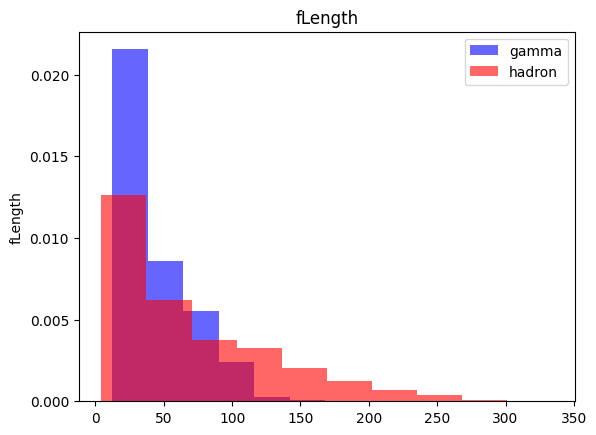

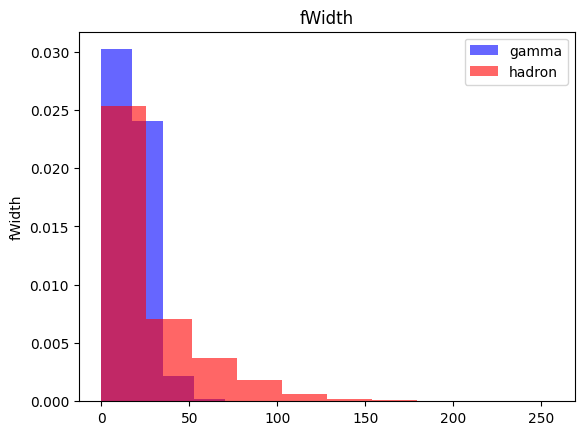

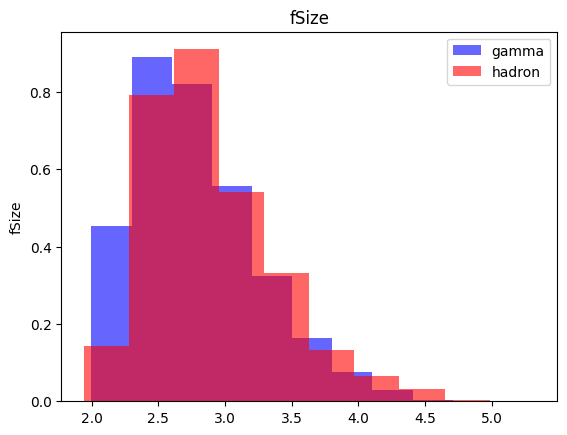

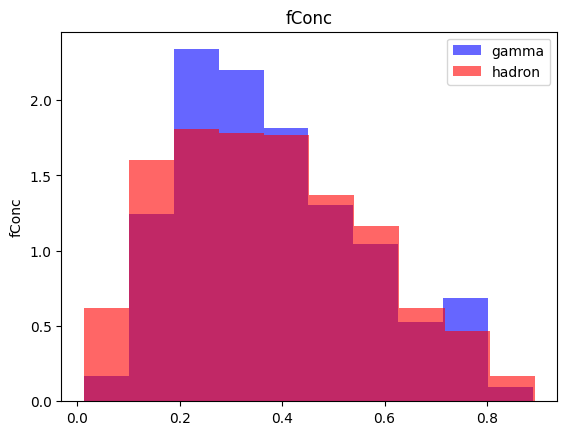

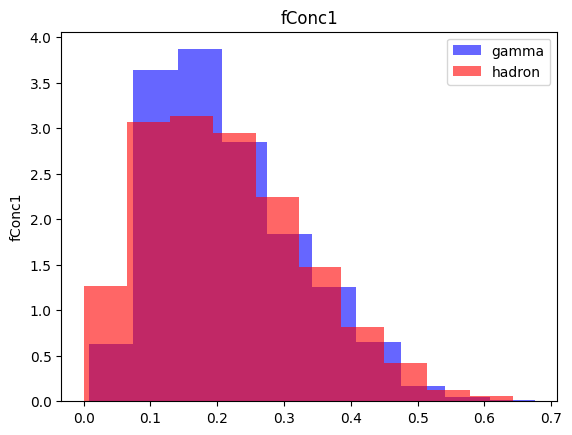

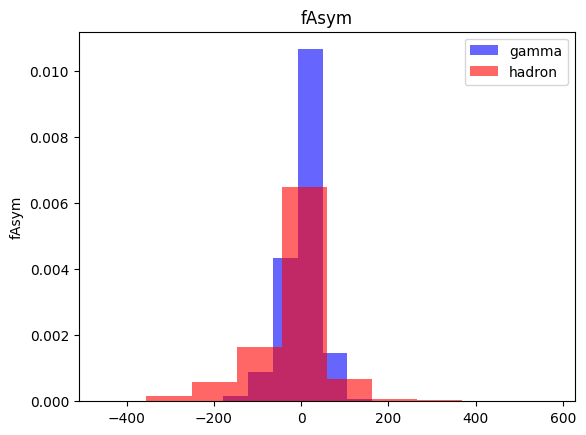

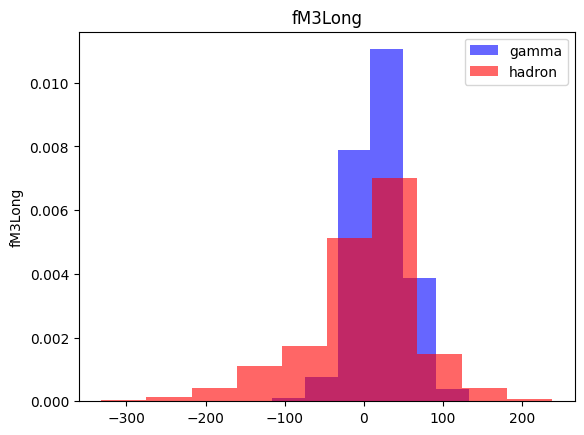

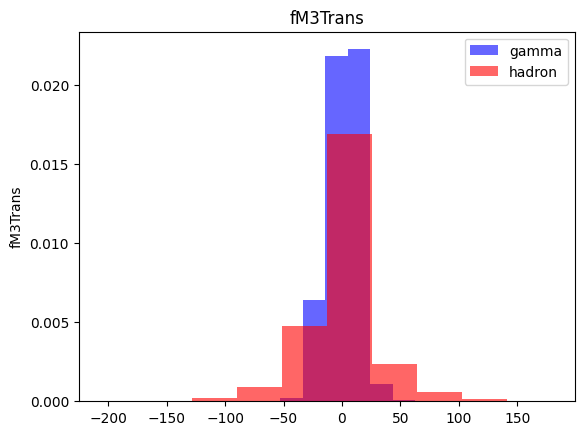

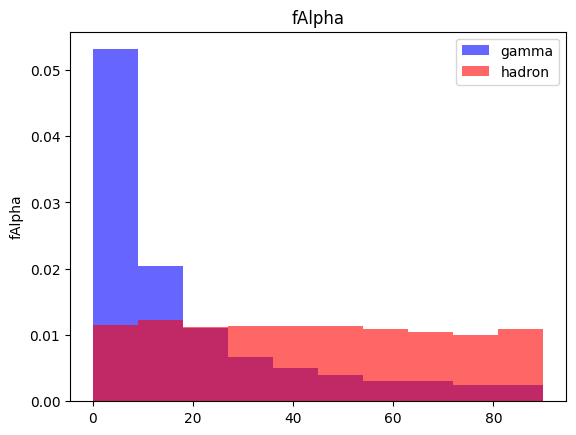

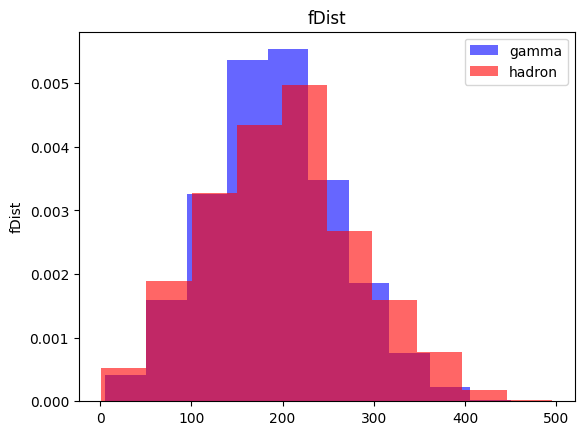

In [ ]:
for label in columns[:-1]:
  # normalize values with density = True
  plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.6, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.6, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.ylabel(label)
  plt.legend()
  plt.show()


In [ ]:
# split data into training, validation, and test

train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))  ])

In [ ]:
# function to scale data values
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()

  X = scalar.fit_transform(X)

  # if one class oversampled then fix
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)


  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [ ]:
"""
k nearest neighbor
- take majority classification from k neighbors
- calculate using euclid distance between points
- can project to higher dimensions and multiple features
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
kmodel = KNeighborsClassifier(n_neighbors=1)
kmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = kmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1313
           1       0.85      0.89      0.87      2491

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [ ]:
"""
naive bayes
P(A | B) = P(A ∩ B) / P(B)

bayes rule
A = posterior
P(A | B) = (P(B | A) * P(A)) / P(B)
P(A | B, C, D, E....) proportional to P(B | A) * P(C | A) * P(D | A) * ... * P(A)
"""
from sklearn.naive_bayes import GaussianNB

In [ ]:
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = naivemodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53      1313
           1       0.75      0.90      0.82      2491

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.72      3804

